<a href="https://colab.research.google.com/github/riphunter7001x/ML-FOR-PRATICE-EDA/blob/main/Logistic_Regression_%2B_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression + EDA**

DATASET

for this we take "titanic dataset" from kaggle [link](https://https://www.kaggle.com/competitions/titanic/data)

GOAL:-

try to predict survived or descesed



In [4]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# importing titanic dataset
df = pd.read_csv("train.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA

In [7]:
# to finding missing value

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

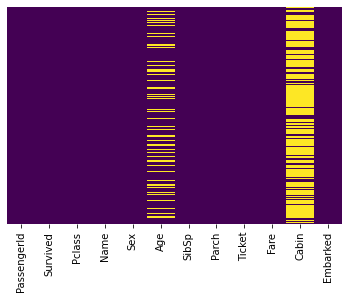

In [8]:
# vizulization by heatmap 
# by we are able to know that on which column missing values are present by grafically

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap= "viridis")

<Axes: xlabel='Survived', ylabel='count'>

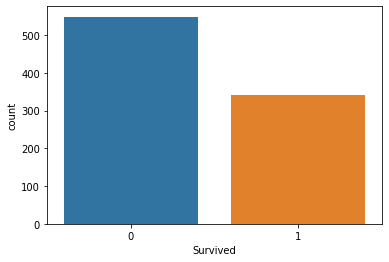

In [9]:
# countplot
sns.countplot(x="Survived",data=df)

<Axes: xlabel='Survived', ylabel='count'>

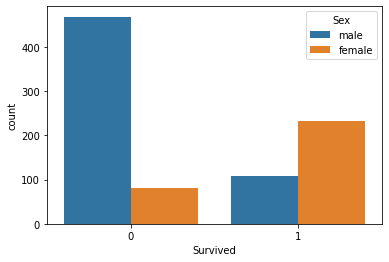

In [10]:
# by sex how many are survived
sns.countplot(x="Survived",hue="Sex",data=df)

<Axes: xlabel='Survived', ylabel='count'>

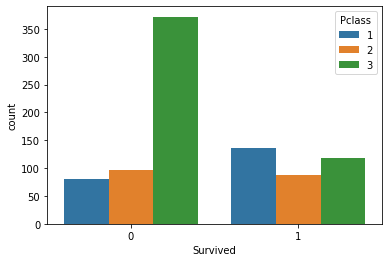

In [11]:
# by persons calss
sns.countplot(x="Survived",hue = "Pclass",data=df)

<Axes: xlabel='SibSp', ylabel='count'>

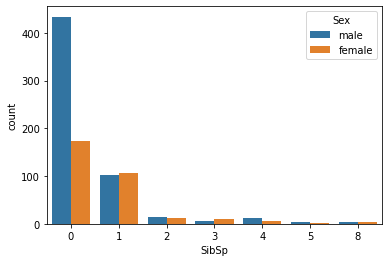

In [12]:
# of siblings
sns.countplot(x="SibSp",hue="Sex",data=df)

<ipython-input-61-ce13efeebe2b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"].dropna(),kde=False,bins=40,color="darkred")


<Axes: xlabel='Age'>

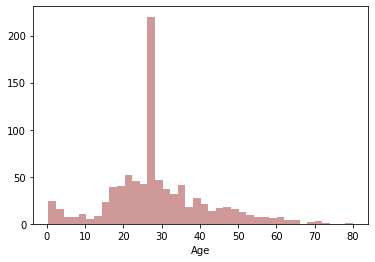

In [61]:
# distribution plot
# by thhhis we are able to find how what are the age of person at that point

sns.distplot(df["Age"].dropna(),kde=False,bins=40,color="darkred")

In [14]:
# by this we are able to find relation 
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


DATA CLEANING

<Axes: xlabel='Pclass', ylabel='Age'>

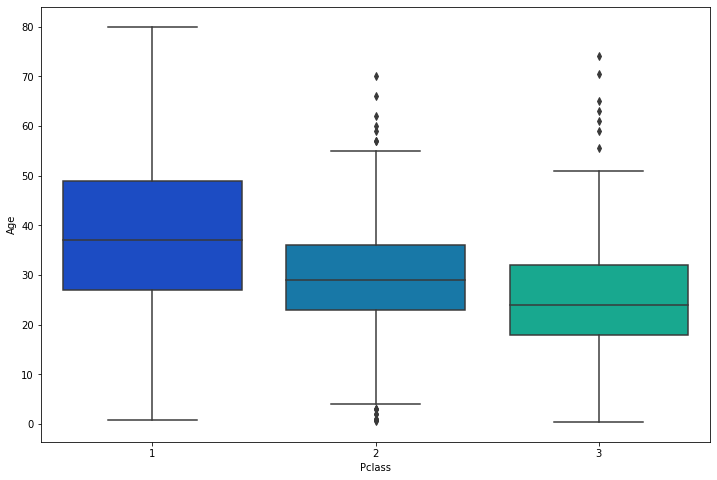

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Pclass",y="Age",data = df  ,palette = "winter" )

In [16]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[0]

  if pd.isnull(Age):
    if Pclass == 1:
      return 33
    elif Pclass == 2:
      return 29
    else:
      return 27
  else:
    return Age


In [17]:
df["Age"] = df[["Age","Pclass"]].apply(impute_age,axis=1)

<Axes: >

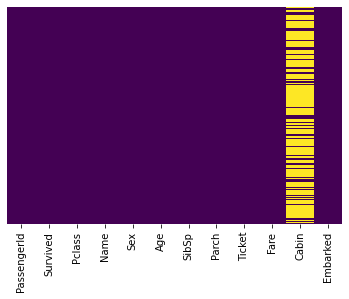

In [18]:
# CHECKING again
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap= "viridis")

In [19]:
# for now we in "cabin" column we theere are more than many null value for we have to to do feature ennginearing so drop it for now
df.drop("Cabin",axis=1,inplace=True)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

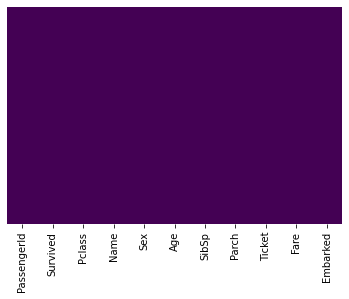

In [21]:
# if we look again 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap= "viridis")

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [24]:
# convert ccategorical featurs
pd.get_dummies(df["Embarked"],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
sex = pd.get_dummies(df["Sex"],drop_first=True)
embark = pd.get_dummies(df["Embarked"],drop_first=True)

In [26]:
df.drop(["Sex","Embarked","Name","Ticket"],axis = 1,inplace = True)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [28]:
# now add those dummies column
df = pd.concat([df,sex ,embark],axis = 1)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [30]:
# building logistic regretion model


In [31]:
# train test split


In [32]:
df.drop("Survived",axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [33]:
df["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
from sklearn.model_selection  import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(df.drop("Survived",axis=1),df["Survived"],test_size = 0.30,random_state=100)

Training And Predicting Model


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
logreg = LogisticRegression(solver='liblinear')

In [53]:
logmodel = LogisticRegression(penalty='l2', solver='saga', max_iter=10000, warm_start=True)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000, solver='saga', warm_start=True)

In [54]:
## we use "test_x" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logmodel.predict(X_test)

In [52]:
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))

So, Our accuracy Score is: 0.7239


In [56]:
from sklearn.metrics import confusion_matrix

In [58]:
acc = confusion_matrix(y_test,y_pred)
acc

array([[156,   3],
       [ 71,  38]])

In [59]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0])